# An Analysis of the 2019 Stack Overflow Survey Data
This analysis is going to follow the CRISP-DM methodology, cross-industry process for data mining. CRISP-DM is a robust and well known methodology that provides a structured approach to planning a data mining project. It includes the following processes:

1. business understanding
2. data understanding
3. prepare data
4. data modelling
5. evaluate the results
6. deploy

#  Business Understanding

With nearly 90 000 responses fielded from over 170 countries and dependent territories, <b>Stack Overflow Annual Developer</b> Survey continues to be the most comprehensive survey of software developers ever conducted. The survey covers aspects such as career satisfaction and job search to programming languages.



- What is the programming language of choice?
- What's the pay for developers ?
- What is the framework of choice for developers?
-  Are developers satisfied with thier career?





In [29]:
# Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#  Data Understanding



In [30]:
df = pd.read_csv("survey_results_public.csv", low_memory = False)
schema = pd.read_csv("survey_results_schema.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [31]:
df.shape

(88883, 85)

In [32]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [33]:
schema.shape

(85, 2)

The survey data consists of 88,883 records and 85 fetures.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [35]:
# check columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [36]:
# check which columns have over 50% missing values
set(df.columns[100*df.isna().sum()/df.shape[0] > 50])

set()

In [37]:
# check is we have missing schemas
schema.isnull().sum()

Column          0
QuestionText    0
dtype: int64

# What is the programming of choice?

### Prepare Data

There are just so, so many programming languages. And when you don't know much, which is very usual at the start, this can be very overwhelming. So let's take a look at what different developers from around the world use. That should give us an idea of what laguagues are important for what fields. 

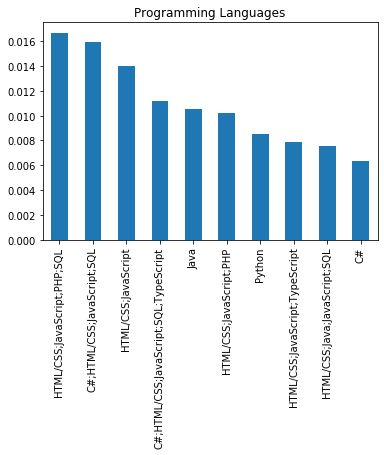

In [38]:
count_values = df.LanguageWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

# display the top 10

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Programming Languages");

In [39]:
# the format of programming languages needs to be cleaned up, this is because for developers using multiple languages, 
# those languages are concatenated with ;

In [40]:
# We have to split the LanguageWorkedWith to get a proper picture
languages = df[df['LanguageWorkedWith'].notnull()]

unique_languages = {}

# split the languages on ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

### Model Data

In [41]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

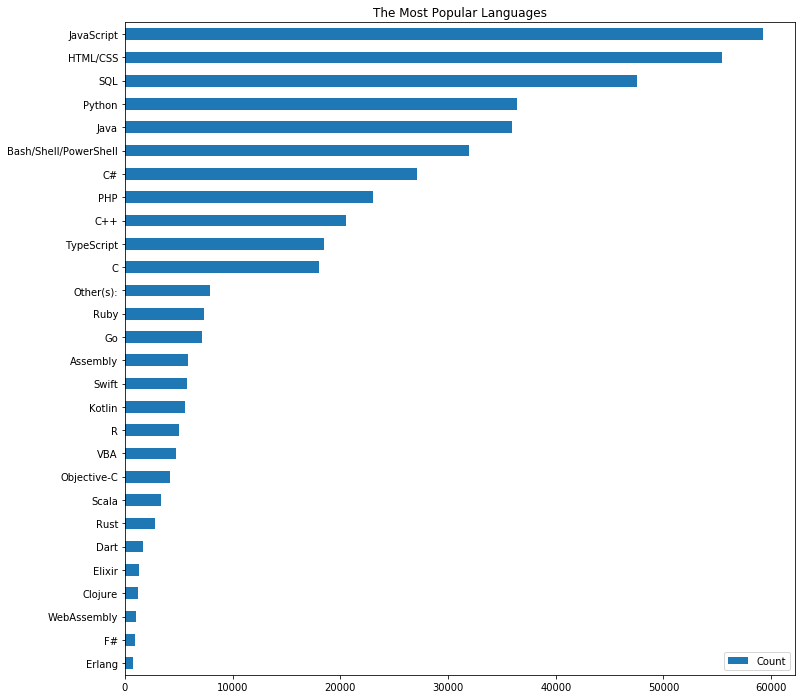

In [42]:
# let make a bar graph
plot_dimension_count(unique_languages,'The Most Popular Languages')

__Insight__



from the above insights javascript is most popular  language of choice for developers then followed by html and css . Offcourse its one of the mostly widely used programming launaguge 


# What's the pay for developers like?


### Prepare Data

In [43]:
salaries_df = df[['DevType', 'Country','ConvertedComp']]

for column in salaries_df.columns.tolist():
    col_desc = schema[schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


In [44]:
# Lets check for missing values in salaries_df
salaries_df.isnull().sum()

DevType           7548
Country            132
ConvertedComp    33060
dtype: int64

In [45]:
# salaries_df missing values in %
round((salaries_df.isnull().sum()/salaries_df.shape[0])*100,1)

DevType           8.5
Country           0.1
ConvertedComp    37.2
dtype: float64

__Insight__

it seems that a large number of developers do not reveal their salaries, and this could be due to privacy concerns.



To assess the pay for developers, we will make use of salaries distribution by country. This allows us to compare like with like.

In [46]:
# drop rows with missing values from salaries df
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,ConvertedComp
0,2,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
1,3,"Developer, full-stack",United States,61000.0
2,5,Data or business analyst;Data scientist or mac...,Canada,366420.0
3,8,"Database administrator;Developer, back-end;Dev...",New Zealand,95179.0
4,9,Data or business analyst;Data scientist or mac...,India,13293.0


In [47]:
clean_salaries_df.shape

(55081, 4)

In [48]:
# Lets make a count of developer by country
clean_salaries_df.Country.value_counts().reset_index()

,index,Country
0,United States,14756
1,United Kingdom,3967
2,India,3953
3,Germany,3734
4,Canada,2225
...,...,...
155,Chad,1
156,Saint Vincent and the Grenadines,1
157,Timor-Leste,1
158,Guinea,1


A large number of countries are under-represented, the US has by far the largest of respondents.

### Model Data

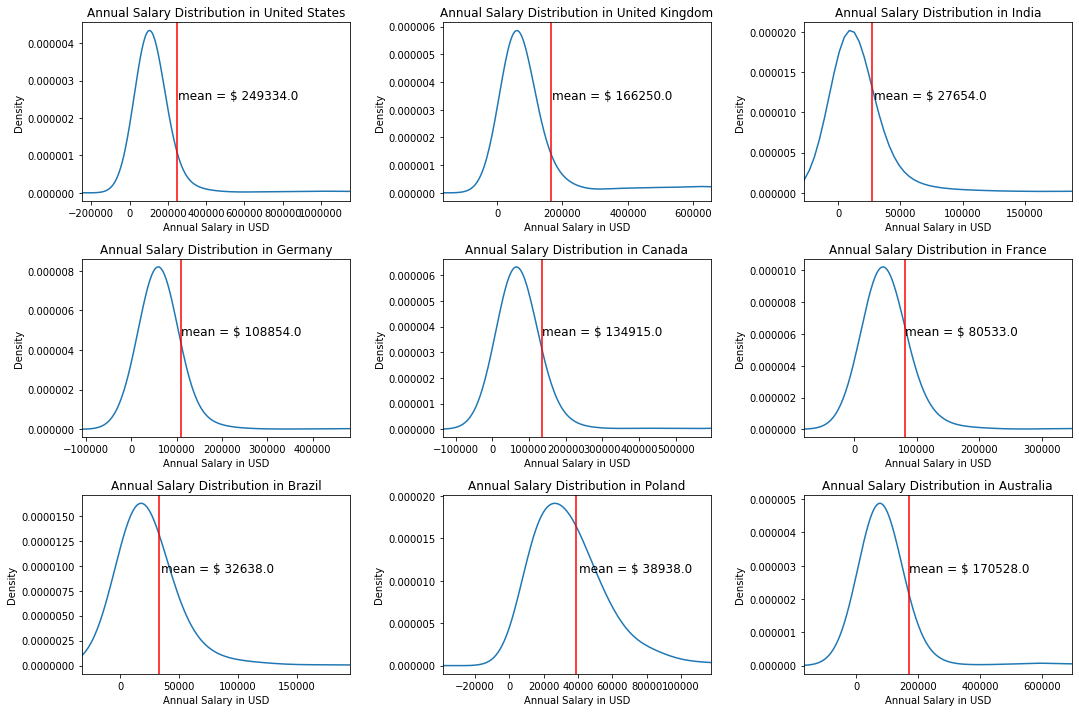

In [49]:
# now lets plot salary distributions for the top 10 countries

fig = plt.figure(figsize=(15,10))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()


The US has by far the highest salaries.



The mean salaries are much higher than the overall average for USA.


# What is the framework of choice for developers?



### Prepare Data

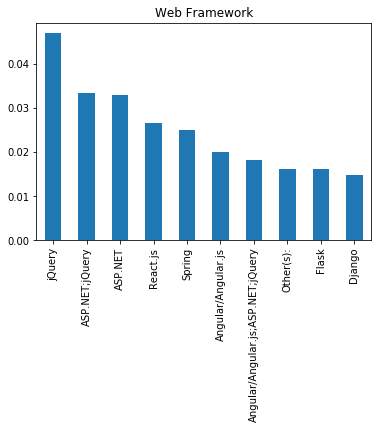

In [50]:
count_values = df.WebFrameWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

# display the top 10

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Web Framework");

In [51]:
# the format of web frameworks needs to be cleaned up, this is because for developers using multiple frameworks, 
# those frameworks are concatenated with ;

In [52]:
# We have to split the WebFrameWorkedWithto get a proper picture
frameworks = df[df['WebFrameWorkedWith'].notnull()]

unique_frameworks = {}

# split the webframework on ;
for framework_set in frameworks['WebFrameWorkedWith'].apply(lambda row: str(row).split(';')):
    for framework in framework_set:
        if framework not in unique_frameworks.keys():
            unique_frameworks[framework] = 1
        else:
            unique_frameworks[framework] += 1
    

### Model Data

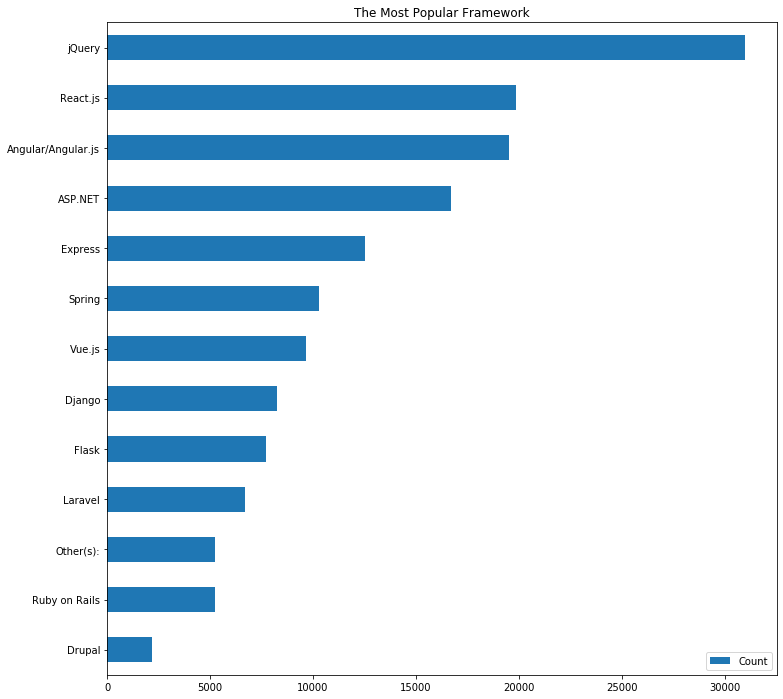

In [53]:
# let make a bar graph
framework_count = pd.DataFrame.from_dict(unique_frameworks, orient='index', dtype=None)
framework_count.columns = ['Count']
framework_count.sort_values('Count',ascending=True,inplace=True)

framework_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'The Most Popular Framework');

__Insight__

Very interesting, JQuery, Reach and  andAngular  are the top three frameworks of choice for Web Developement .

Flask is not far behind too.



#  Are developers satisfied with thier career?


Our focus is on career satisfaction of full-time developers (people who writes code), we'll filter the data accordingly and remove all na values in career satisfaction column in order to get more accurate results. 

### Data Prepare

In [54]:
careerSat_data =  df[(~ df['CareerSat'].isna()) 
                       & (df['Employment'] == 'Employed full-time') 
                       & (df['MainBranch'] == 'I am a developer by profession')]
careerSat_data.shape

(55405, 85)

### Model Data

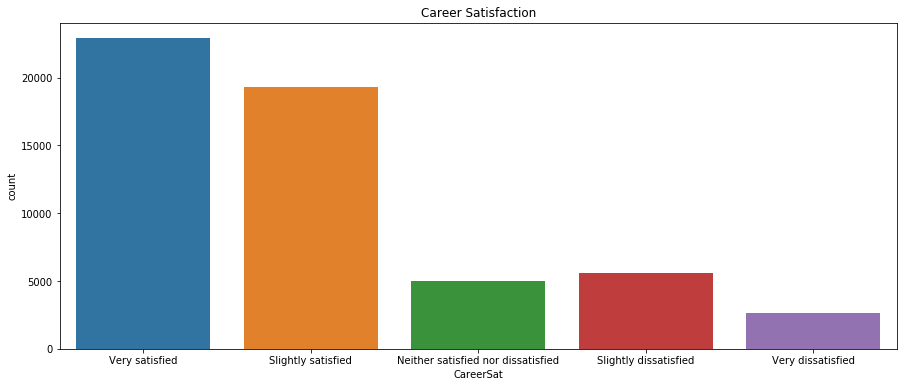

In [55]:
fig, ax = plt.subplots(1,1,figsize =(15,6))

ax.title.set_text('Career Satisfaction')
sns.countplot(careerSat_data['CareerSat'] ,order=['Very satisfied', 
                                                  'Slightly satisfied', 
                                                  'Neither satisfied nor dissatisfied',
                                                  'Slightly dissatisfied',
                                                  'Very dissatisfied'], ax = ax)



In [56]:
satisfaied_devs_perc = careerSat_data[careerSat_data['CareerSat'].isin(
    ['Very satisfied', 'Slightly satisfied'])].shape[0] / careerSat_data.shape[0] * 100
satisfaied_devs_perc

76.15558162620702

From the above plot we can till that most developers are satisfied with career path, to validate the result we calculated the percentage of satisfied developers over the whole sample, thus we can say that most developers are satisfied with thier career.



### Summary of Results

After analyzing the data, we found that Javascript is the most popuaar programming language 
 highest paied  in the USA. Surprisingly, jQuery is the web framework of choice.

